<a href="https://colab.research.google.com/github/JahedNaghipoor/Machine-Learning/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Titanic using different classification algorithms


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Train_Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


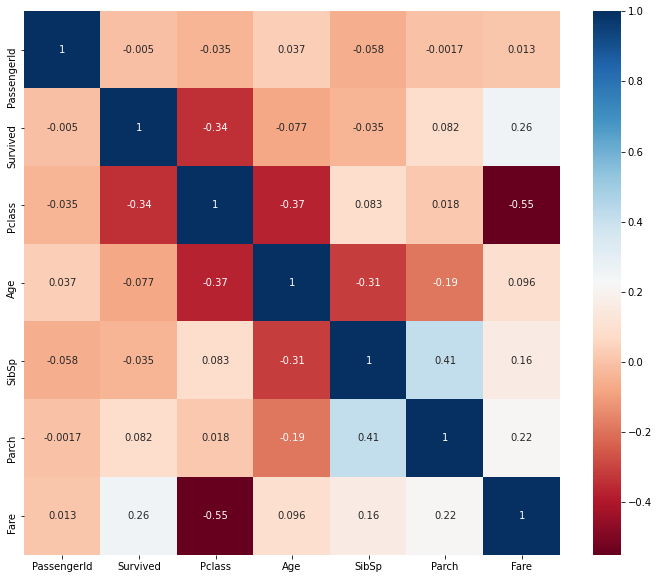

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.RdBu, linecolor='white')
#observation : title has a bit positive effect on survival and gender and Pclass have negative effects on survival!

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x720 with 0 Axes>

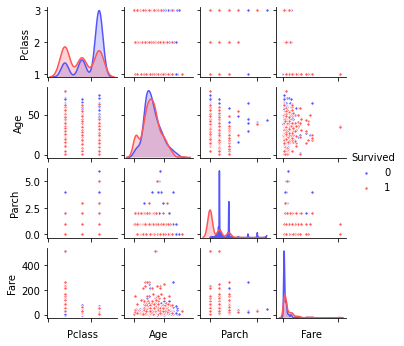

In [ ]:
plt.figure(figsize=(12,10))
g = sns.pairplot(df[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [ ]:
survived = df[df['Survived']==1]
not_survived = df[df['Survived']==0]

In [ ]:
Survived_percentage = len(survived)/len(df)*100
Not_Survived_percentage = len(not_survived)/len(df)*100
print(Survived_percentage, '%')
print(Not_Survived_percentage, '%')

38.38383838383838 %
61.61616161616161 %


In [ ]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


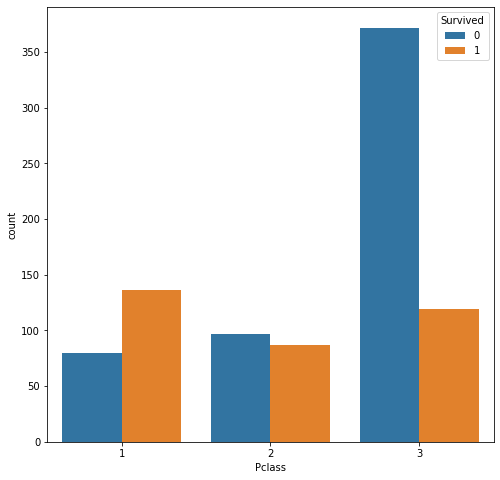

In [ ]:
plt.figure(figsize = [8,8])
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)
# observation: more people died from class 3 

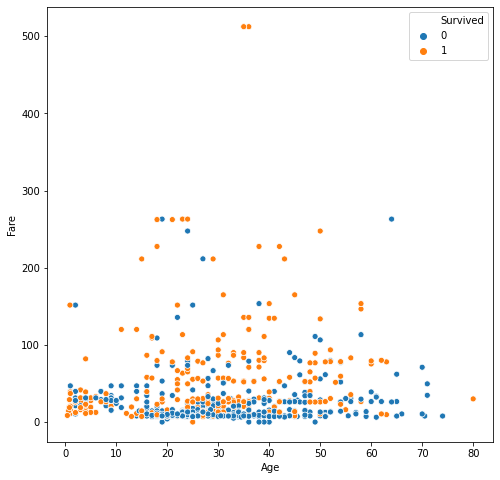

In [ ]:
plt.figure(figsize = [8,8])
sns.scatterplot(df['Age'], df['Fare'], hue = df['Survived'])
# observation:more fare,  more chance of survaval

In [ ]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


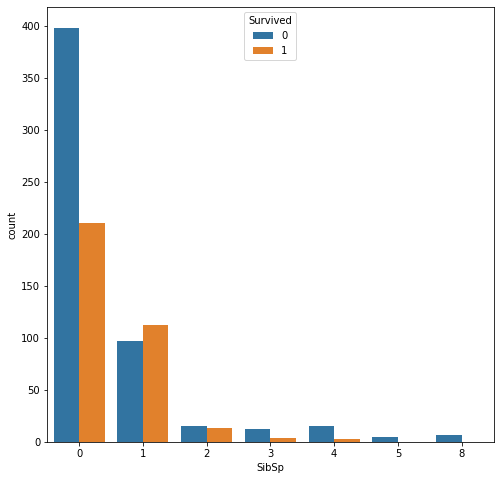

In [ ]:
plt.figure(figsize = [8,8])
sns.countplot(x = 'SibSp', hue = 'Survived', data = df)
# Observation: more people survived with one or no sibling

In [ ]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


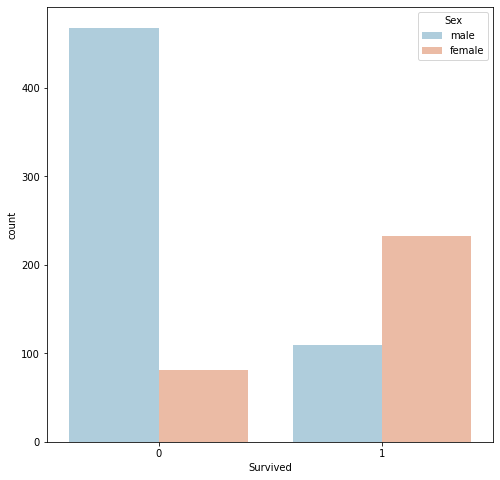

In [ ]:
plt.figure(figsize = [8,8])
sns.countplot(x = 'Survived', hue = 'Sex', data = df, palette='RdBu_r')
# Observation: more women survived!!!

In [ ]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
df[['Title', 'Survived']].groupby(['Title'], as_index=True).count()

,Survived
Title,
Master,40
Miss,185
Mr,517
Mrs,126
Rare,23


In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)

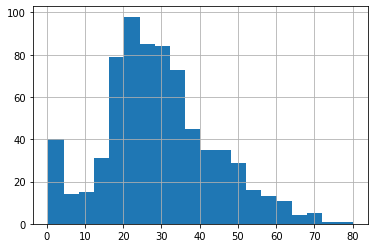

In [ ]:
df['Age'].hist(bins = 20)

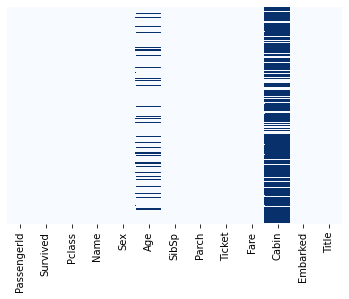

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cbar=False, cmap='Blues')

In [ ]:
# drop not important features
df.drop(['PassengerId','Name', 'Ticket', 'Embarked', 'Cabin'], axis = 1, inplace = True)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,3
2,1,3,female,26.0,0,0,7.9250,2
3,1,1,female,35.0,1,0,53.1000,3
4,0,3,male,35.0,0,0,8.0500,1
5,0,3,male,NaN,0,0,8.4583,1
6,0,1,male,54.0,0,0,51.8625,1
7,0,3,male,2.0,3,1,21.0750,4
8,1,3,female,27.0,0,2,11.1333,3
9,1,2,female,14.0,1,0,30.0708,3


In [ ]:
mean_age_male = df[df['Sex']=='male'].mean()['Age']
mean_age_female = df[df['Sex']=='female'].mean()['Age']

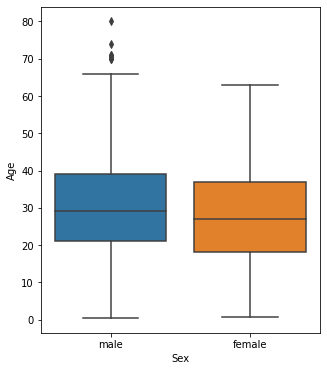

In [ ]:
plt.figure(figsize =(5,6))
sns.boxplot(x = 'Sex', y = 'Age', data = df)
#Average age for men = 30.72, women = 27.91

In [ ]:
def Fill_Age(data):
    age = data[0]
    sex = data[1]
    
    if pd.isnull(age):
        if sex is 'male':
            return df[df['Sex']=='male'].mean()['Age']
        else: 
            return df[df['Sex']=='female'].mean()['Age']
    else:
        return age

In [ ]:
df['Age'] = df[['Age', 'Sex']].apply(Fill_Age, axis = 1)

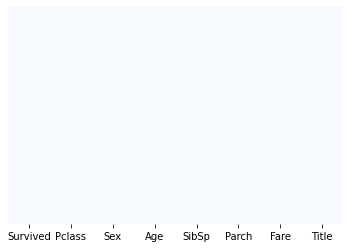

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cbar=False, cmap='Blues')

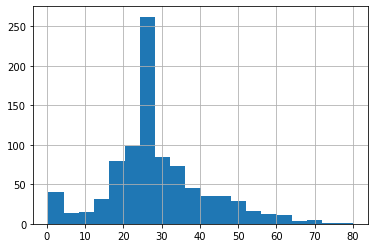

In [ ]:
df['Age'].hist(bins = 20)
#after replacing null elements in age with average age (feature engineering)

In [ ]:
male = pd.get_dummies(df['Sex'], drop_first = True)
male.head(10)

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [ ]:
# replace sex with male
df.drop(['Sex'], axis = 1, inplace = True)
df = pd.concat([df, male], axis = 1)

In [ ]:
df['Age'] = round(df['Age'],2)

In [ ]:
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,male
0,0,3,22.00,1,0,7.2500,1,1
1,1,1,38.00,1,0,71.2833,3,0
2,1,3,26.00,0,0,7.9250,2,0
3,1,1,35.00,1,0,53.1000,3,0
4,0,3,35.00,0,0,8.0500,1,1
5,0,3,27.92,0,0,8.4583,1,1
6,0,1,54.00,0,0,51.8625,1,1
7,0,3,2.00,3,1,21.0750,4,1
8,1,3,27.00,0,2,11.1333,3,0
9,1,2,14.00,1,0,30.0708,3,0


In [ ]:
# machine learning import
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Train Data
X = df.drop('Survived', axis = 1).values
y= df['Survived'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

In [ ]:
#Logistic regression
classifier_regression = LogisticRegression(random_state=0)
classifier_regression.fit(X_train,y_train)
y_predict_regression = classifier_regression.predict(X_test)
accuracy_regression = round(classifier_regression.score(X_train, y_train)*100,2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#heatmap for test set
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_predict_regression)

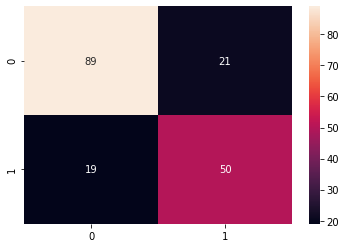

In [ ]:
Report:sns.heatmap(cm_test, annot=True, fmt='d' )

In [ ]:
# Report for regression:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_regression))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       110
           1       0.70      0.72      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
# K Nearest Neighbor
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    classifier = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_predict=classifier.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_predict)

    
    std_acc[n-1]=np.std(y_predict==y_test)/np.sqrt(y_predict.shape[0])

mean_acc

array([0.68156425, 0.70949721, 0.70391061, 0.7150838 , 0.75418994,
       0.74860335, 0.76536313, 0.72067039, 0.74301676])

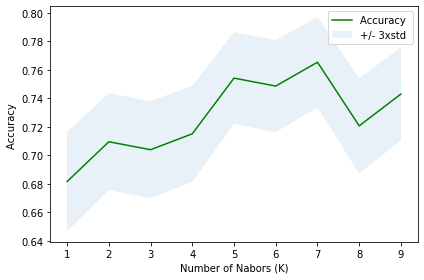

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
classifier_KNN.fit(X_train, y_train)
y_predict_KNN = classifier_KNN.predict(X_test)
accuracy_KNN = round(classifier_KNN.score(X_train, y_train)*100,2)

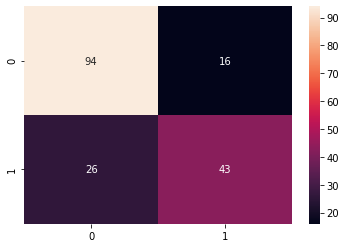

In [ ]:
cm = confusion_matrix(y_test, y_predict_KNN)
sns.heatmap(cm, annot=True)

In [ ]:
# Report for KNN (k=7):
print(classification_report(y_test, y_predict_KNN))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       110
           1       0.73      0.62      0.67        69

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.74       179
weighted avg       0.76      0.77      0.76       179



In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
accuracy_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [ ]:
# Random Forest
randomforest_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

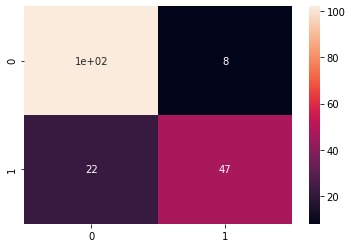

In [ ]:
y_predict_randomforest = randomforest_classifier.predict(X_test)
accuracy_randomForest = round(randomforest_classifier.score(X_train, y_train)*100,2)
cm  = confusion_matrix(y_test, y_predict_randomforest)
sns.heatmap(cm,  annot=True)

In [ ]:
print(classification_report(y_test, y_predict_randomforest))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       110
           1       0.85      0.68      0.76        69

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
# Supprt Vector Machine
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_predict_svc = svc_model.predict(X_test)
accuracy_svc = round(svc_model.score(X_train, y_train)*100,2)

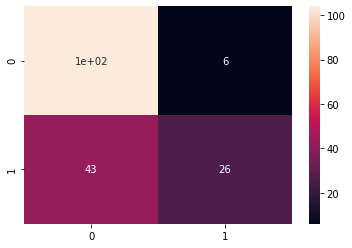

In [ ]:
cm = confusion_matrix(y_test, y_predict_svc)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_svc))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       110
           1       0.81      0.38      0.51        69

    accuracy                           0.73       179
   macro avg       0.76      0.66      0.66       179
weighted avg       0.75      0.73      0.70       179



In [ ]:
#parameter optimization for SVC:
param_grid = {'C': [1, 0.1, 1,10,100,1000] , 'gamma': [10, 1,0.1,0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.657, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.608, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.641, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.592, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.655, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.671, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.662, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.734, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.748, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.683, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.761, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.732, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.650, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    6.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
grid_predict = grid.predict(X_test)
accuracy_svc_gridSearch = round(grid.score(X_train, y_train)*100,2)

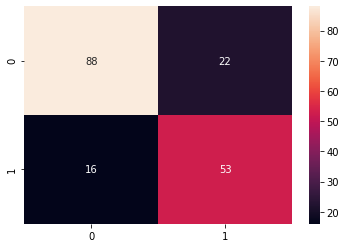

In [ ]:
cm= confusion_matrix(y_test, grid_predict)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, grid_predict))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       110
           1       0.71      0.77      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



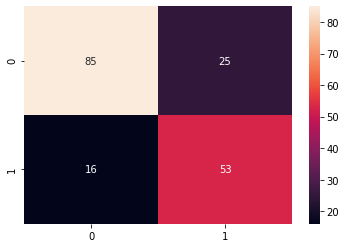

In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_predict_gaussian = gaussian.predict(X_test)
accuracy_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
cm = confusion_matrix(y_test, y_predict_gaussian)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_gaussian))

              precision    recall  f1-score   support

           0       0.84      0.77      0.81       110
           1       0.68      0.77      0.72        69

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.78      0.77      0.77       179



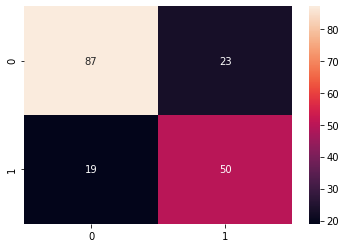

In [ ]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_predict_perceptron = perceptron.predict(X_test)
accuracy_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
cm = confusion_matrix(y_test, y_predict_perceptron)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_perceptron))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       110
           1       0.68      0.72      0.70        69

    accuracy                           0.77       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.77      0.77      0.77       179



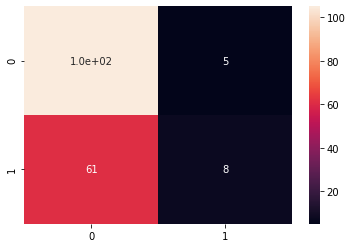

In [ ]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_predict_sgd = sgd.predict(X_test)
accuracy_sgd = round(sgd.score(X_train, y_train) * 100, 2)
cm = confusion_matrix(y_test, y_predict_sgd)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_sgd))

              precision    recall  f1-score   support

           0       0.63      0.95      0.76       110
           1       0.62      0.12      0.20        69

    accuracy                           0.63       179
   macro avg       0.62      0.54      0.48       179
weighted avg       0.63      0.63      0.54       179



In [ ]:
models = pd.DataFrame({
    'Model': ['SVC', 'KNN (k=5)', 'Logistic Regression', 'Decision Tree' ,
              'Random Forest', 'SVC with grid Search', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent'],
    'Score': [accuracy_svc, accuracy_KNN, accuracy_regression, accuracy_decision_tree, 
              accuracy_randomForest, accuracy_svc_gridSearch, accuracy_gaussian, accuracy_perceptron, 
              accuracy_sgd]})
models.sort_values(by='Score', ascending=False, ignore_index=True)

,Model,Score
0,Decision Tree,98.46
1,Random Forest,98.46
2,SVC with grid Search,83.15
3,Logistic Regression,82.58
4,Naive Bayes,81.60
5,Perceptron,81.18
6,KNN (k=5),79.49
7,SVC,67.28
8,Stochastic Gradient Decent,64.61
